# **Data preparing**

- Importing neccesary libraries



In [ ]:
from google.colab import drive
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
drive.mount('/content/drive')

Mounted at /content/drive


5 v 5 Lol match result analysis and prediction with Artificial Neural Network

- General apperance of our data



---
The dataset consist of 6998 (83976/12) individual mathces

Each match has player statistics and team statistics.

Dataset has 12 row per match 10 for individual players and 2 for each team.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2021_LoL_esports_match_data_from_OraclesElixir_20210626.csv", low_memory=False)
df.head
len(df)

83976

- First 3 matches is from old patch so we have to get rid of them

In [ ]:
df = df.drop(df.head(36).index, inplace=False)
len(df)

83940

- Get complete matches (Data have some partially complete matches)

In [ ]:
df = df[df['datacompleteness'] == 'complete']
len(df)

print("We have down to " ,int(len(df)/12), " matches.")

We have down to  6745  matches.


- List of Columns

In [ ]:
for i in list(df):
  print("* ", i)

*  gameid
*  datacompleteness
*  url
*  league
*  year
*  split
*  playoffs
*  date
*  game
*  patch
*  playerid
*  side
*  position
*  player
*  team
*  champion
*  ban1
*  ban2
*  ban3
*  ban4
*  ban5
*  gamelength
*  result
*  kills
*  deaths
*  assists
*  teamkills
*  teamdeaths
*  doublekills
*  triplekills
*  quadrakills
*  pentakills
*  firstblood
*  firstbloodkill
*  firstbloodassist
*  firstbloodvictim
*  team kpm
*  ckpm
*  firstdragon
*  dragons
*  opp_dragons
*  elementaldrakes
*  opp_elementaldrakes
*  infernals
*  mountains
*  clouds
*  oceans
*  dragons (type unknown)
*  elders
*  opp_elders
*  firstherald
*  heralds
*  opp_heralds
*  firstbaron
*  barons
*  opp_barons
*  firsttower
*  towers
*  opp_towers
*  firstmidtower
*  firsttothreetowers
*  inhibitors
*  opp_inhibitors
*  damagetochampions
*  dpm
*  damageshare
*  damagetakenperminute
*  damagemitigatedperminute
*  wardsplaced
*  wpm
*  wardskilled
*  wcpm
*  controlwardsbought
*  visionscore
*  vspm
*  totalgold


- Deleteing unneccesary columns

gameid

datacompleteness

url

league

year

split

playoffs

date

game

patch

playerid

position

player

kills

deaths

team

firstbloodkill

firstbloodassist

firstbloodvictim

dragons (type unknown)

damageshare

earnedgoldshare

total cs

In [ ]:
columnstodrop = ['gameid','datacompleteness','url','league','year','split','playoffs','date','game','patch','playerid','position','player','kills','deaths','team','firstbloodkill','firstbloodassist','firstbloodvictim','dragons (type unknown)','damageshare','earnedgoldshare','total cs']
dfdropped = df.drop(columns=columnstodrop, inplace=False)

In [ ]:
pd.set_option('display.max_columns', None)
dfdropped.reset_index(drop=True, inplace=True)
dfdropped.head(12)

,side,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,Blue,Karma,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,2,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18444,539.8244,332.8976,325.1415,13,0.3805,10,0.2927,3,NaN,NaN,10711,6253,183.0146,10675.0,NaN,272.0,4,4,0,8.0780,3429.0,4942.0,89.0,3296.0,4984.0,87.0,133.0,-42.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5323.0,7876.0,148.0,5165.0,7909.0,146.0,158.0,-33.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Blue,Pantheon,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,1,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8585,251.2683,869.0927,541.3171,12,0.3512,12,0.3512,12,NaN,NaN,10106,5648,165.3073,10100.0,NaN,23.0,174,115,3,5.7659,3271.0,3982.0,71.0,3437.0,3958.0,77.0,-166.0,24.0,-6.0,0.0,0.0,0.0,0.0,0.0,1.0,5034.0,5828.0,106.0,4967.0,6102.0,114.0,67.0,-274.0,-8.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Blue,Syndra,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,0,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13105,383.5610,262.5951,170.5463,5,0.1463,13,0.3805,1,NaN,NaN,13284,8826,258.3220,13425.0,NaN,303.0,40,24,10,10.0390,3842.0,4901.0,100.0,3324.0,4827.0,91.0,518.0,74.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,5933.0,8127.0,169.0,5375.0,8104.0,159.0,558.0,23.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Blue,Samira,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,2,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20740,607.0244,726.0000,424.0390,10,0.2927,18,0.5268,5,NaN,NaN,13742,9284,271.7268,12825.0,NaN,335.0,25,19,0,10.5366,3446.0,3308.0,100.0,3296.0,3155.0,91.0,150.0,153.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,5519.0,6156.0,160.0,5220.0,5651.0,149.0,299.0,505.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Blue,Leona,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,1,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2441,71.4439,368.4293,529.8146,61,1.7854,30,0.8780,19,NaN,NaN,6774,2316,67.7854,6525.0,NaN,54.0,0,0,0,1.5805,2189.0,2507.0,20.0,2092.0,2641.0,14.0,97.0,-134.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3006.0,3134.0,25.0,3137.0,3462.0,22.0,-131.0,-328.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Red,Aatrox,Graves,Ornn,Akali,Kennen,Jayce,2050,1,6,9,3,0.0,0.0,0.0,0.0,NaN,0.2634,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7861,230.0780,1012.5951,895.0537,18,0.5268,4,0.1171,7,NaN,NaN,13468,9010,263.7073,13325.0,NaN,280.0,36,18,4,9.2488,3296.0,4984.0,87.0,3429.0,4942.0,89.0,-133.0,42.0,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,5165.0,7909.0,146.0,5323.0,7876.0,148.0,-158.0,33.0,-2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Red,Nidalee,Graves,Ornn,Akali,Kennen,Jayce,2050,1,6,9,3,0.0,0.0,0.0,0.0,NaN,0.2634,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- We deleted unneccesary columns 
Now we have to merge champions and positions for each match

In [ ]:
dfmergeteam = dfdropped.copy()
dfmergeteam['top'] =""
dfmergeteam['jng'] =""
dfmergeteam['mid'] =""
dfmergeteam['bot'] =""
dfmergeteam['sup'] =""


for i in range(0, len(dfmergeteam),12):
  dfmergeteam.at[i+10, 'top'] = dfmergeteam.at[i,'champion']
  dfmergeteam.at[i+10, 'jng'] = dfmergeteam.at[i+1,'champion']
  dfmergeteam.at[i+10, 'mid'] = dfmergeteam.at[i+2,'champion']
  dfmergeteam.at[i+10, 'bot'] = dfmergeteam.at[i+3,'champion']
  dfmergeteam.at[i+10, 'sup'] = dfmergeteam.at[i+4,'champion']
  dfmergeteam.at[i+11, 'top'] = dfmergeteam.at[i+5,'champion']
  dfmergeteam.at[i+11, 'jng'] = dfmergeteam.at[i+6,'champion']
  dfmergeteam.at[i+11, 'mid'] = dfmergeteam.at[i+7,'champion']
  dfmergeteam.at[i+11, 'bot'] = dfmergeteam.at[i+8,'champion']
  dfmergeteam.at[i+11, 'sup'] = dfmergeteam.at[i+9,'champion']



In [ ]:
dfmergeteam.head(12)

,side,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,top,jng,mid,bot,sup
0,Blue,Karma,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,2,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18444,539.8244,332.8976,325.1415,13,0.3805,10,0.2927,3,NaN,NaN,10711,6253,183.0146,10675.0,NaN,272.0,4,4,0,8.0780,3429.0,4942.0,89.0,3296.0,4984.0,87.0,133.0,-42.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5323.0,7876.0,148.0,5165.0,7909.0,146.0,158.0,-33.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,,,,,
1,Blue,Pantheon,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,1,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8585,251.2683,869.0927,541.3171,12,0.3512,12,0.3512,12,NaN,NaN,10106,5648,165.3073,10100.0,NaN,23.0,174,115,3,5.7659,3271.0,3982.0,71.0,3437.0,3958.0,77.0,-166.0,24.0,-6.0,0.0,0.0,0.0,0.0,0.0,1.0,5034.0,5828.0,106.0,4967.0,6102.0,114.0,67.0,-274.0,-8.0,0.0,0.0,0.0,0.0,0.0,1.0,,,,,
2,Blue,Syndra,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,0,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13105,383.5610,262.5951,170.5463,5,0.1463,13,0.3805,1,NaN,NaN,13284,8826,258.3220,13425.0,NaN,303.0,40,24,10,10.0390,3842.0,4901.0,100.0,3324.0,4827.0,91.0,518.0,74.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,5933.0,8127.0,169.0,5375.0,8104.0,159.0,558.0,23.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,,,,,
3,Blue,Samira,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,2,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20740,607.0244,726.0000,424.0390,10,0.2927,18,0.5268,5,NaN,NaN,13742,9284,271.7268,12825.0,NaN,335.0,25,19,0,10.5366,3446.0,3308.0,100.0,3296.0,3155.0,91.0,150.0,153.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,5519.0,6156.0,160.0,5220.0,5651.0,149.0,299.0,505.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
4,Blue,Leona,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,1,3,9,0.0,0.0,0.0,0.0,NaN,0.0878,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2441,71.4439,368.4293,529.8146,61,1.7854,30,0.8780,19,NaN,NaN,6774,2316,67.7854,6525.0,NaN,54.0,0,0,0,1.5805,2189.0,2507.0,20.0,2092.0,2641.0,14.0,97.0,-134.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3006.0,3134.0,25.0,3137.0,3462.0,22.0,-131.0,-328.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
5,Red,Aatrox,Graves,Ornn,Akali,Kennen,Jayce,2050,1,6,9,3,0.0,0.0,0.0,0.0,NaN,0.2634,0.3512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7861,230.0780,1012.5951,895.0537,18,0.5268,4,0.1171,7,NaN,NaN,13468,9010,263.7073,13325.0,NaN,280.0,36,18,4,9.2488,3296.0,4984.0,87.0,3429.0,4942.0,89.0,-133.0,42.0,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,5165.0,7909.0,146.0,5323.0,7876.0,148.0,-158.0,33.0,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,,,,,
6,Red,Nidalee,Graves,Ornn,Akali,Kennen,Jayce,2050,1,6,9,3,0.0,0.0,0.0,0.0,NaN,0.2634,0.3512,NaN,NaN,NaN,NaN,Na

- Droppig individual player statistics

In [ ]:
indexes_to_drop = [i+x for i in range(0,len(dfmergeteam),12) for x in range(10)] 
indexes_to_keep = set(range(dfmergeteam.shape[0])) - set(indexes_to_drop)
dfonlyteams = dfmergeteam.take(list(indexes_to_keep))

In [ ]:
print("We have ",len(dfonlyteams),"(6745*2) mathces")
print("For each match there is 2 sides therefore 2x rows yields.")

We have  13490 (6745*2) mathces
For each match there is 2 sides therefore 2x rows yields.


- Now we can get rid of champions column

In [ ]:
dfonlyteams.drop(columns=['champion'], inplace=True)

In [ ]:
dfonlyteams.reset_index(drop=True, inplace=True)
dfonlyteams.head(12)


,side,ban1,ban2,ban3,ban4,ban5,gamelength,result,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,top,jng,mid,bot,sup
0,Blue,Azir,Kai'Sa,Rell,Sion,Viktor,2136,1,34,17,14,2.0,0.0,0.0,0.0,0.0,0.4775,0.8708,1.0,3.0,2.0,3.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,11.0,2.0,1.0,1.0,4.0,0.0,79803,2241.6573,3195.5899,2532.6124,119,3.3427,55,1.5449,44,250.0,7.0225,71078,47913,1345.8708,64405.0,0.033227,960.0,296,171,60,35.2809,17930.0,20416.0,355.0,16132.0,18098.0,306.0,1798.0,2318.0,49.0,4.0,7.0,3.0,3.0,4.0,4.0,27754.0,32731.0,564.0,23884.0,28829.0,488.0,3870.0,3902.0,76.0,6.0,11.0,4.0,4.0,5.0,6.0,Renekton,Lillia,Lucian,Kalista,Neeko
1,Red,Irelia,Syndra,Udyr,Samira,Ezreal,2136,0,23,14,17,3.0,0.0,0.0,0.0,1.0,0.3933,0.8708,0.0,2.0,3.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,11.0,0.0,0.0,0.0,4.0,64516,1812.2472,3301.9101,3136.7135,131,3.6798,71,1.9944,40,284.0,7.9775,63481,40316,1132.4719,62300.0,-0.033227,1002.0,221,144,21,34.3539,16132.0,18098.0,306.0,17930.0,20416.0,355.0,-1798.0,-2318.0,-49.0,3.0,4.0,4.0,4.0,7.0,3.0,23884.0,28829.0,488.0,27754.0,32731.0,564.0,-3870.0,-3902.0,-76.0,4.0,5.0,6.0,6.0,11.0,4.0,Aatrox,Nidalee,Orianna,Aphelios,Thresh
2,Blue,Draven,Renekton,Thresh,Lucian,Viktor,2299,0,43,22,21,4.0,2.0,0.0,0.0,1.0,0.5742,1.1222,1.0,3.0,2.0,3.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,5.0,11.0,1.0,1.0,0.0,5.0,92075,2403.0013,3260.7742,3950.8395,104,2.7142,54,1.4093,40,237.0,6.1853,70039,45211,1179.9304,66850.0,-0.018011,1014.0,211,144,13,31.9704,18402.0,18688.0,298.0,15045.0,16445.0,275.0,3357.0,2243.0,23.0,10.0,11.0,3.0,3.0,4.0,10.0,27069.0,29143.0,495.0,23206.0,26450.0,457.0,3863.0,2693.0,38.0,10.0,11.0,3.0,3.0,4.0,10.0,Sett,Rumble,Lee Sin,Samira,Alistar
3,Red,Senna,Varus,Kai'Sa,Orianna,Ryze,2299,1,52,21,22,3.0,2.0,0.0,0.0,0.0,0.5481,1.1222,0.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,11.0,5.0,0.0,0.0,5.0,0.0,81973,2139.3562,3475.1718,3817.4772,148,3.8625,46,1.2005,65,312.0,8.1427,73849,49021,1279.3649,68065.0,0.018011,867.0,323,199,57,31.0570,15045.0,16445.0,275.0,18402.0,18688.0,298.0,-3357.0,-2243.0,-23.0,3.0,4.0,10.0,10.0,11.0,3.0,23206.0,26450.0,457.0,27069.0,29143.0,495.0,-3863.0,-2693.0,-38.0,3.0,4.0,10.0,10.0,11.0,3.0,Darius,Udyr,Sylas,Tristana,Rell
4,Blue,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2050,0,6,3,9,0.0,0.0,NaN,NaN,1.0,0.0878,0.3512,1.0,4.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,1.0,3.0,6.0,1.0,1.0,0.0,1.0,63315,1853.1220,2559.0146,1990.8585,101,2.9561,83,2.4293,40,NaN,NaN,54617,32329,946.2146,53550.0,-0.000467,987.0,243,162,13,36.0000,16177.0,19640.0,380.0,15445.0,19565.0,360.0,732.0,75.0,20.0,1.0,1.0,0.0,0.0,0.0,1.0,24815.0,31121.0,608.0,23864.0,31228.0,590.0,951.0,-107.0,18.0,1.0,1.0,0.0,0.0,0.0,1.0,Karma,Pantheon,Syndra,Samira,Leona
5,Red,Graves,Ornn,Akali,Kennen,Jayce,2050,1,28,9,3,1.0,0.0,NaN,NaN,0.0,0.2634,0.3512,0.0,4.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,6.0,3.0,0.0,0.0,1.0,0.0,58406,1709.4439,2940.4390,2526.6146,161,4.7122,61,1.7854,46,NaN,NaN,60520,38232,1118.9854,

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(dfonlyteams)

Your selected dataframe has 98 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
quadrakills,2084,15.4
pentakills,2084,15.4
heralds,2084,15.4
opp_heralds,2084,15.4
visionscore,2084,15.4
vspm,2084,15.4
firstbaron,116,0.9
minionkills,86,0.6
cspm,86,0.6
ban5,60,0.4


- All of these columns are absolutely neccesary thus we have to drop to avoid wrong calculations.

In [ ]:
dfonlyteams = dfonlyteams.dropna()
missing_values_table(dfonlyteams)

Your selected dataframe has 98 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
dfonlyteams.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11178 entries, 0 to 13489
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   side                      11178 non-null  object 
 1   ban1                      11178 non-null  object 
 2   ban2                      11178 non-null  object 
 3   ban3                      11178 non-null  object 
 4   ban4                      11178 non-null  object 
 5   ban5                      11178 non-null  object 
 6   gamelength                11178 non-null  int64  
 7   result                    11178 non-null  int64  
 8   assists                   11178 non-null  int64  
 9   teamkills                 11178 non-null  int64  
 10  teamdeaths                11178 non-null  int64  
 11  doublekills               11178 non-null  float64
 12  triplekills               11178 non-null  float64
 13  quadrakills               11178 non-null  float64
 14  pentak

- We have to convert object types to numerical values


We will use binary encoding for side, Blue as 0 Red as 1.

We will use one hot encoding for bans and champions.

In [ ]:
dfonlyteams["side"] = np.where(dfonlyteams["side"].str.contains("Blue"), 0, 1)

We will do some special feature engineering, by adding binary features respect to featrures below.

visionscore

minionkills

golddiffat10

xpdiffat10

csdiffat10

golddiffat15

xpdiffat15

-For difference values

In [ ]:
posnegfeatures = ['golddiffat10','xpdiffat10','csdiffat10','golddiffat15','xpdiffat15','csdiffat15']
for i in posnegfeatures:
  dfonlyteams[i+'binary'] = 0
  for j in range(len(dfonlyteams)):
    if dfonlyteams.iloc[j].loc[i]>=0:
      dfonlyteams.iloc[j].loc[i+'binary'] = 1

(11178, 98)
(11178, 99)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(11178, 99)
(11178, 100)
(11178, 100)
(11178, 101)
(11178, 101)
(11178, 102)
(11178, 102)
(11178, 103)
(11178, 103)
(11178, 104)


- For values will be compared

In [ ]:
comparedfatures = ['visionscore','minionkills']
for i in comparedfatures:
  dfonlyteams[i+'binary'] = 0
  for j in range(0,len(dfonlyteams),2):
    if dfonlyteams.iloc[j].loc[i]-dfonlyteams.iloc[j+1].loc[i] >=0:
      dfonlyteams.iloc[j].loc[i+'binary'] = 1
    else:
       dfonlyteams.iloc[j+1].loc[i+'binary'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- Checking datatypes

In [ ]:
dfonlyteams.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11178 entries, 0 to 13489
Data columns (total 106 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   side                      int64  
 1   ban1                      object 
 2   ban2                      object 
 3   ban3                      object 
 4   ban4                      object 
 5   ban5                      object 
 6   gamelength                int64  
 7   result                    int64  
 8   assists                   int64  
 9   teamkills                 int64  
 10  teamdeaths                int64  
 11  doublekills               float64
 12  triplekills               float64
 13  quadrakills               float64
 14  pentakills                float64
 15  firstblood                float64
 16  team kpm                  float64
 17  ckpm                      float64
 18  firstdragon               float64
 19  dragons                   float64
 20  opp_dragons               f

- Creating dummies for categorical variables by one hot encoding

In [ ]:
dfwithdummy = pd.get_dummies(dfonlyteams)
dfwithdummy.head(10)

side  gamelength  result  assists  teamkills  teamdeaths  doublekills  \
0      0        2136       1       34         17          14          2.0   
1      1        2136       0       23         14          17          3.0   
2      0        2299       0       43         22          21          4.0   
3      1        2299       1       52         21          22          3.0   
8      0        1661       1       57         24           5          4.0   
9      1        1661       0       14          5          24          0.0   
14     0        1833       0       32         16          25          1.0   
15     1        1833       1       52         25          16          6.0   
20     0        1209       1       54         30          10          4.0   
21     1        1209       0       19         10          30          0.0   

    triplekills  quadrakills  pentakills  firstblood  team kpm    ckpm  \
0           0.0          0.0         0.0         0.0    0.4775  0.8708   
1           0.0          0.0         0.0         1.0    0.3933  0.8708   
2           2.0          0.0         0.0         1.0    0.5742  1.1222   
3           2.0          0.0         0.0         0.0    0.5481  1.1222   
8           0.0          0.0         0.0         1.0    0.8669  1.0476   
9           0.0          0.0         0.0         0.0    0.1806  1.0476   
14          0.0          0.0         0.0         1.0    0.5237  1.3421   
15          0.0          0.0         0.0         0.0    0.8183  1.3421   
20          1.0          1.0         0.0         1.0    1.4888  1.9851   
21          0.0          0.0         0.0         0.0    0.4963  1.9851   

    firstdragon  dragons  opp_dragons  elementaldrakes  opp_elementaldrakes  \
0           1.0      3.0          2.0              3.0                  2.0   
1           0.0      2.0          3.0              2.0                  3.0   
2           1.0      3.0          2.0              3.0                  2.0   
3           0.0      2.0          3.0              2.0                  3.0   
8           0.0      3.0          1.0              3.0                  1.0   
9           1.0      1.0          3.0              1.0                  3.0   
14          0.0      0.0          4.0              0.0                  4.0   
15          1.0      4.0          0.0              4.0                  0.0   
20          1.0      1.0          1.0              1.0                  1.0   
21          0.0      1.0          1.0              1.0                  1.0   

    infernals  mountains  clouds  oceans  elders  opp_elders  firstherald  \
0         0.0        1.0     0.0     2.0     0.0         0.0          0.0   
1         0.0        0.0     1.0     1.0     0.0         0.0          1.0   
2         1.0        1.0     0.0     1.0     0.0         0.0          0.0   
3         0.0        0.0     0.0     2.0     0.0         0.0          1.0   
8         1.0        0.0     0.0     2.0     0.0         0.0          1.0   
9         0.0        0.0     1.0     0.0     0.0         0.0          0.0   
14        0.0        0.0     0.0     0.0     0.0         0.0          1.0   
15        0.0        1.0     1.0     2.0     0.0         0.0          0.0   
20        0.0        1.0     0.0     0.0     0.0         0.0          1.0   
21        0.0        0.0     0.0     1.0     0.0         0.0          0.0   

    heralds  opp_heralds  firstbaron  barons  opp_barons  firsttower  towers  \
0       1.0          1.0         1.0     2.0         0.0         1.0    11.0   
1       1.0          1.0         0.0     0.0         2.0         0.0     2.0   
2       1.0          1.0         0.0     0.0         2.0         1.0     5.0   
3       1.0          1.0         1.0     2.0         0.0         0.0    11.0   
8       1.0          1.0         1.0     1.0         0.0         1.0    11.0   
9       1.0          1.0         0.0     0.0         1.0         0.0     1.0   
14      1.0          1.0         0.0     0.0         2.0       

- We have 1247 Columns

In [ ]:
dfwithdummy.reset_index(drop=True, inplace=True)
dfwithdummy

side  gamelength  result  assists  teamkills  teamdeaths  doublekills  \
0         0        2136       1       34         17          14          2.0   
1         1        2136       0       23         14          17          3.0   
2         0        2299       0       43         22          21          4.0   
3         1        2299       1       52         21          22          3.0   
4         0        1661       1       57         24           5          4.0   
...     ...         ...     ...      ...        ...         ...          ...   
11173     1        1633       0       15          8          13          1.0   
11174     0        1452       1       49         21           4          5.0   
11175     1        1452       0       10          4          21          1.0   
11176     0        1726       0        2          1          11          0.0   
11177     1        1726       1       24         11           1          2.0   

       triplekills  quadrakills  pentakills  firstblood  team kpm    ckpm  \
0              0.0          0.0         0.0         0.0    0.4775  0.8708   
1              0.0          0.0         0.0         1.0    0.3933  0.8708   
2              2.0          0.0         0.0         1.0    0.5742  1.1222   
3              2.0          0.0         0.0         0.0    0.5481  1.1222   
4              0.0          0.0         0.0         1.0    0.8669  1.0476   
...            ...          ...         ...         ...       ...     ...   
11173          0.0          0.0         0.0         0.0    0.2939  0.7716   
11174          3.0          1.0         0.0         0.0    0.8678  1.0331   
11175          0.0          0.0         0.0         1.0    0.1653  1.0331   
11176          0.0          0.0         0.0         0.0    0.0348  0.4171   
11177          1.0          0.0         0.0         1.0    0.3824  0.4171   

       firstdragon  dragons  opp_dragons  elementaldrakes  \
0              1.0      3.0          2.0              3.0   
1              0.0      2.0          3.0              2.0   
2              1.0      3.0          2.0              3.0   
3              0.0      2.0          3.0              2.0   
4              0.0      3.0          1.0              3.0   
...            ...      ...          ...              ...   
11173          0.0      2.0          1.0              2.0   
11174          0.0      2.0          1.0              2.0   
11175          1.0      1.0          2.0              1.0   
11176          1.0      2.0          2.0              2.0   
11177          0.0      2.0          2.0              2.0   

       opp_elementaldrakes  infernals  mountains  clouds  oceans  elders  \
0                      2.0        0.0        1.0     0.0     2.0     0.0   
1                      3.0        0.0        0.0     1.0     1.0     0.0   
2                      2.0        1.0        1.0     0.0     1.0     0.0   
3                      3.0        0.0        0.0     0.0     2.0     0.0   
4                      1.0        1.0        0.0     0.0     2.0     0.0   
...                    ...        ...        ...     ...     ...     ...   
11173                  1.0        0.0        1.0     1.0     0.0     0.0   
11174                  1.0        1.0        0.0     0.0     1.0     0.0   
11175                  2.0        0.0        1.0     0.0     0.0     0.0   
11176                  2.0        1.0        0.0     1.0     0.0     0.0   
11177                  2.0        0.0        0.0     1.0     1.0     0.0   

       opp_elders  firstherald  heralds  opp_heralds  firstbaron  barons  \
0             0.0          0.0      1.0          1.0         1.0     2.0   
1             0.0          1.0      1.0          1.0         0.0     0.0   
2             0.0          0.0      1.0          1.0         0.0     0.0   
3             0.0          1.0      1.0          1.0         1.0     2.0   
4             0.0          1.0      1.0          1.0         1.0     1.0   
...           ...  

# **Data Visiualization**

- Checking  correlation between result variable and with the highest 20

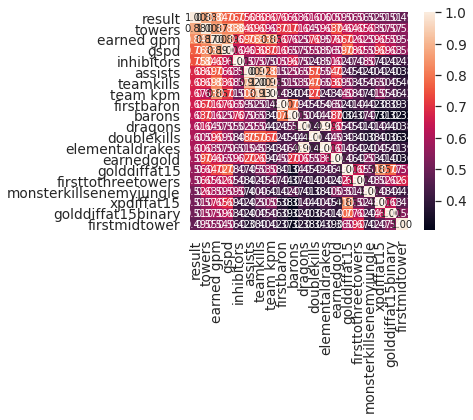

In [ ]:
corrmat = dfwithdummy.corr()
k = 20
cols = corrmat.nlargest(k, 'result')['result'].index
cm = np.corrcoef(dfwithdummy[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,result
1,towers
2,earned gpm
3,gspd
4,inhibitors
5,assists
6,teamkills
7,team kpm
8,firstbaron
9,barons


- Univariate Analysis

- Tower takedowns group around 9 and 2
- Earned gold per miniute is most likely between 800 and 1400
- Taking more than 4 inhibitors is less likely
- Baron isnt killed every match
- Killing more than 3 barons in match is less likely
- Killing more than 5 dragons is not very common
  (There should be more than 5 dragon kills minimum if all of the elemental drakes killed)

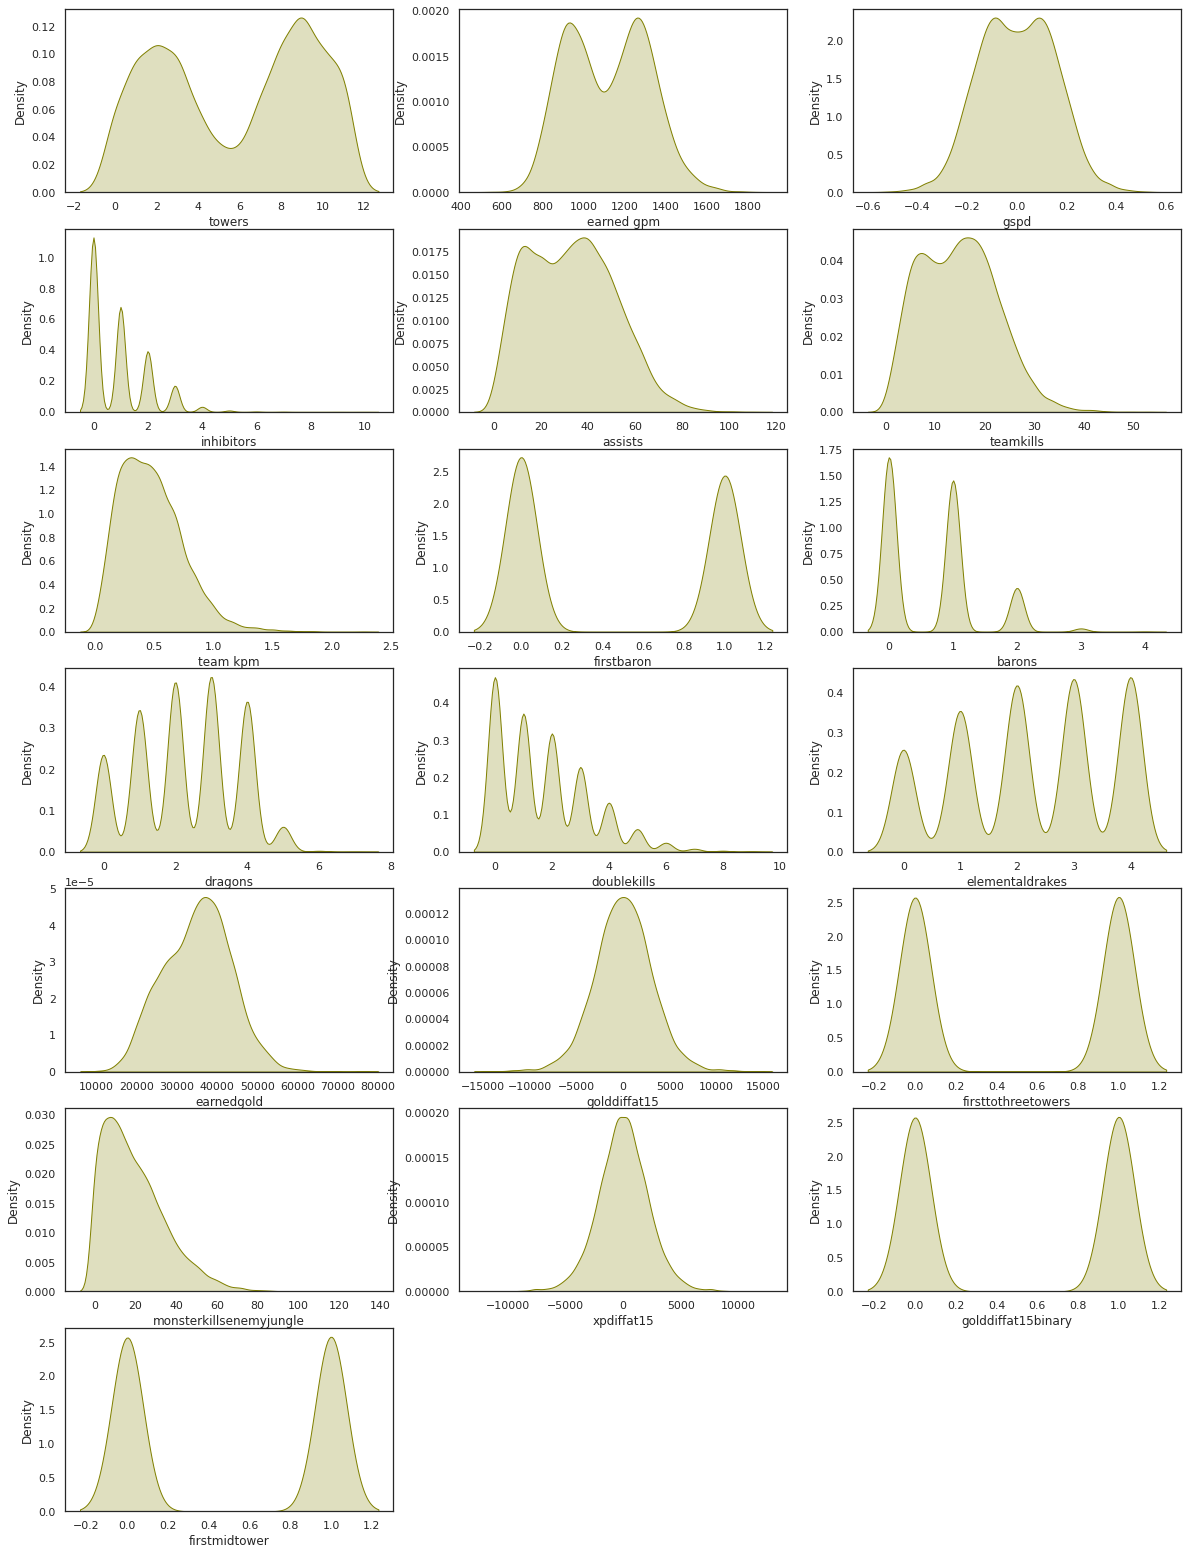

In [ ]:
sns.set(style="white") 
plt.figure(figsize = (20 , 60))
independent = most_corr['Most Correlated Features'].values.tolist()
del independent[0]
for variable in range(len(independent)):
    plt.subplot(15,3 , variable + 1 )
    sns.kdeplot(dfwithdummy[independent[variable]], shade = True, color="olive")
plt.show()

- Bivariate Analysis

- Who took most towers most likely to win

In [ ]:
def barplot(x):
  df1 = dfwithdummy.groupby(x)["result"].value_counts(normalize=True)
  df1 = df1.mul(100)
  df1 = df1.rename('percent').reset_index()

  g = sns.catplot(x=x,y='percent',hue="result",kind='bar',data=df1)
  g.ax.set_ylim(0,100)

  for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

- Hihger tower takedowns leads to win

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


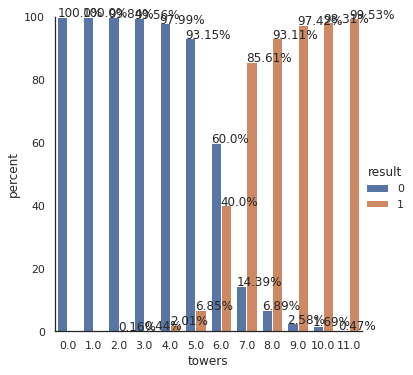

In [ ]:
barplot('towers')

- Kill combos makes winrate higher

 For example 2 pentakill or 3 quadrakills guarantees the win

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


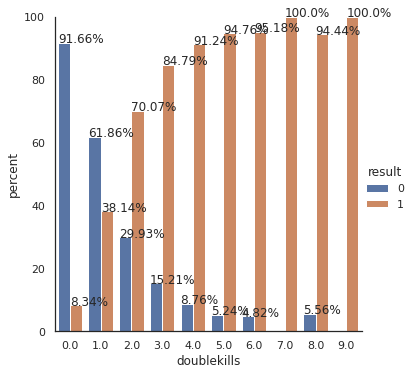

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


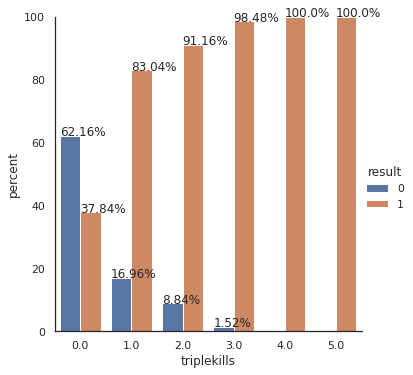

posx and posy should be finite values
posx and posy should be finite values


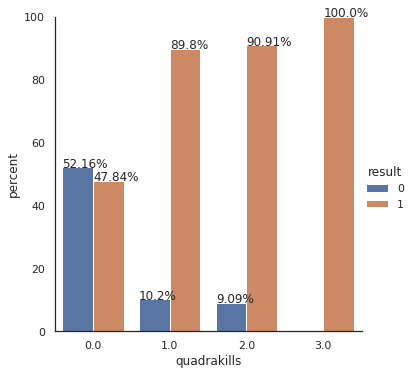

posx and posy should be finite values
posx and posy should be finite values


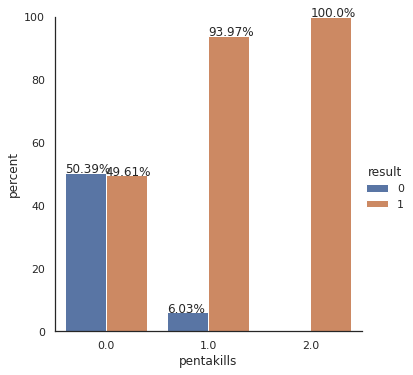

In [ ]:
killtypes = ['doublekills','triplekills','quadrakills','pentakills']
for i in killtypes:
  barplot(i)

- Team who takes the first blood has higher chance to win

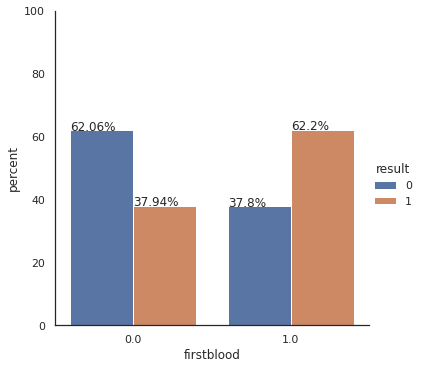

In [ ]:
barplot('firstblood')

- Killing first dragon has no big impact
- Killing more dragons leads to higher chance of win
- Ocean soul is the mos effective respect to win perspective(4th dragon gives soul that which dragon has been killed)
- Elder dragon has a big impact on winning

firstdragon
dragons
infernals
mountains
clouds
oceans
elders


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


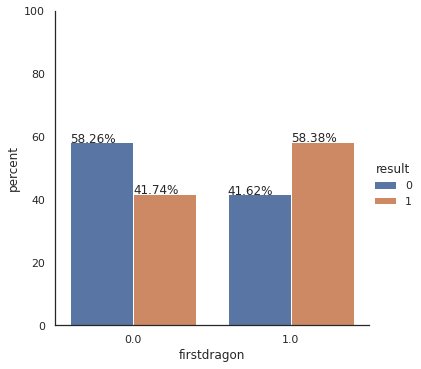

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


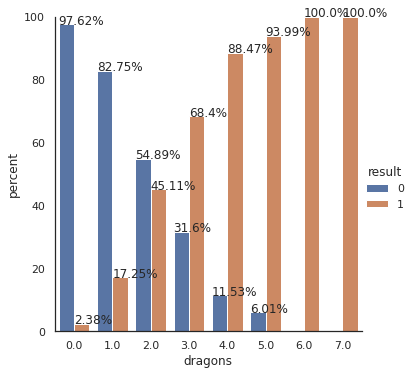

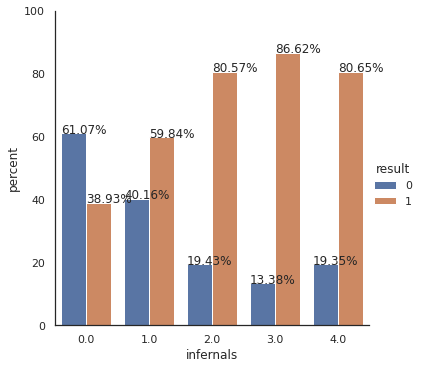

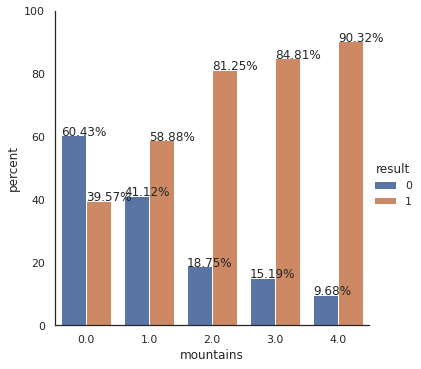

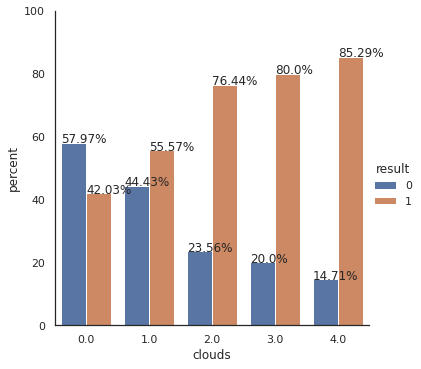

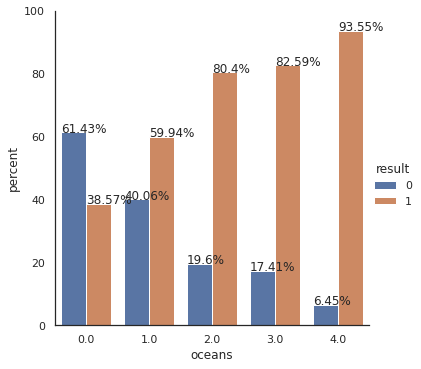

posx and posy should be finite values
posx and posy should be finite values


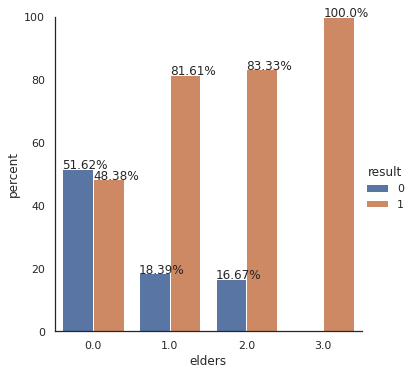

In [ ]:
dragontypes = ['firstdragon','dragons','infernals','mountains','clouds','oceans','elders']

for i in dragontypes:
  print(i)
  barplot(i)

- First heralds gives more oppurtunity to teams
- Team with 2 herald kills has %70 chance to win

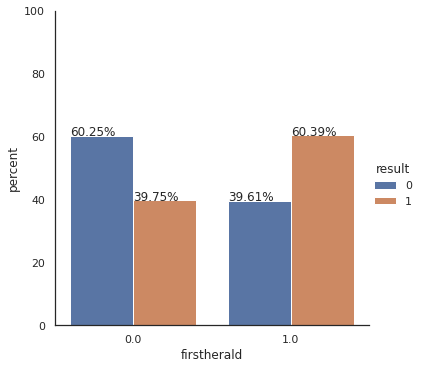

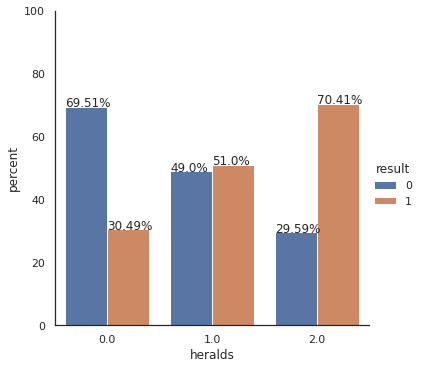

In [ ]:
heralds = ['firstherald','heralds']
for i in heralds:
  barplot(i)

- Team who takes first baron has a very big winning chance

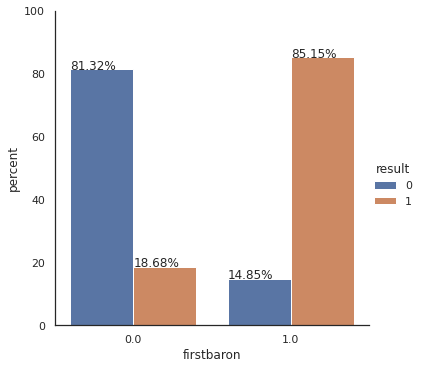

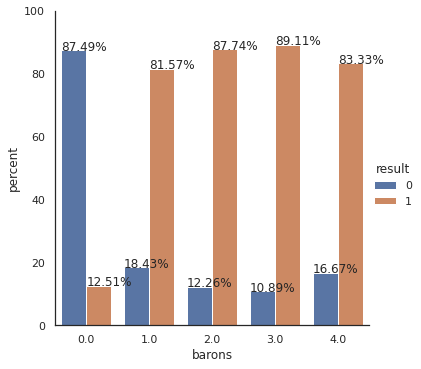

In [ ]:
baron = ['firstbaron','barons']
for i in baron:
  barplot(i)

- Higher vision score leads to higher win rate
- Higher minion score leads to hiher win rate
- golddiffat10, xpdiffat10, csdiffat10, golddiffat15, xpdiffat15, csdiffat15 is highly discriminating for winning (if the team has higher gold from opponent is likely to win)


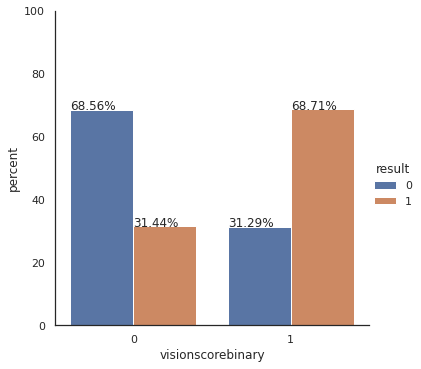

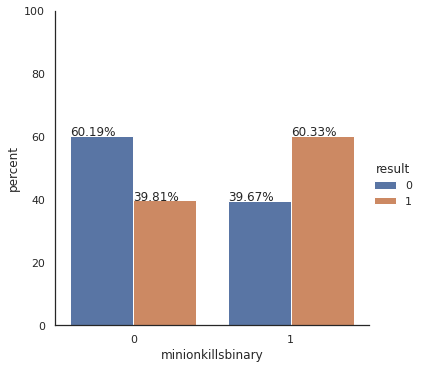

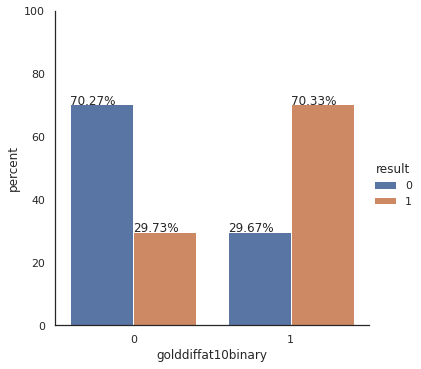

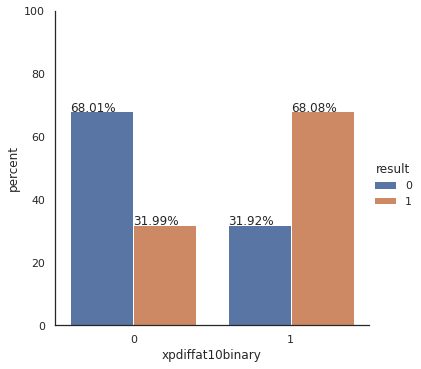

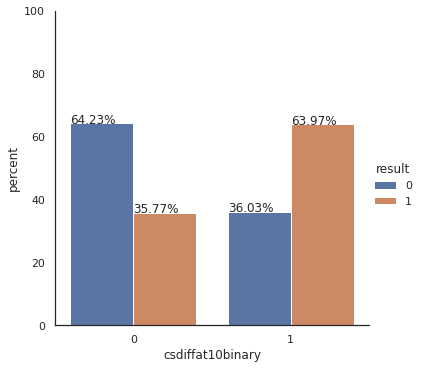

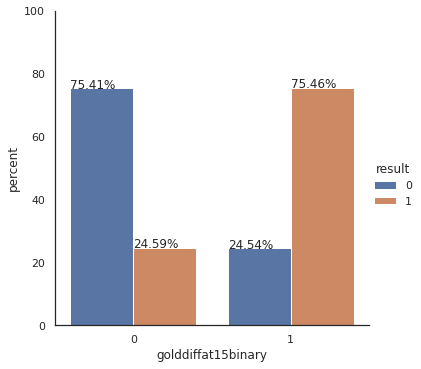

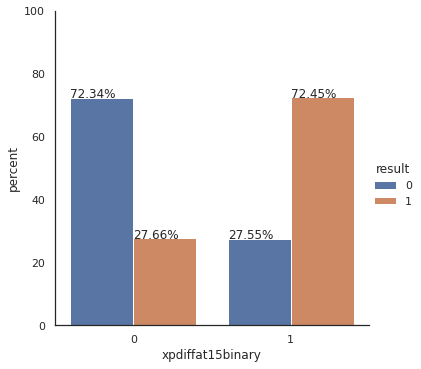

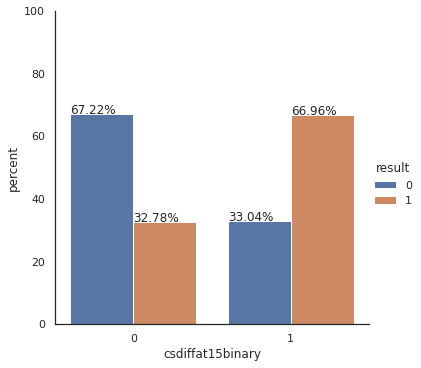

In [ ]:
binarycheck = ['visionscore','minionkills','golddiffat10','xpdiffat10','csdiffat10','golddiffat15','xpdiffat15','csdiffat15']

for i in binarycheck:
  barplot(i+'binary')

- From Earned gold per minute graph we can see who have more than 1400 gpm guarantees winning the game.

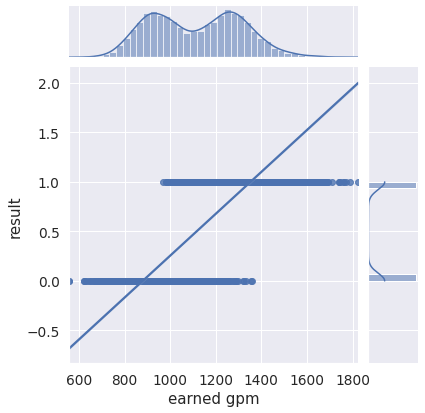

In [ ]:
sns.jointplot(x=dfwithdummy['earned gpm'], y=dfwithdummy['result'], kind='reg')

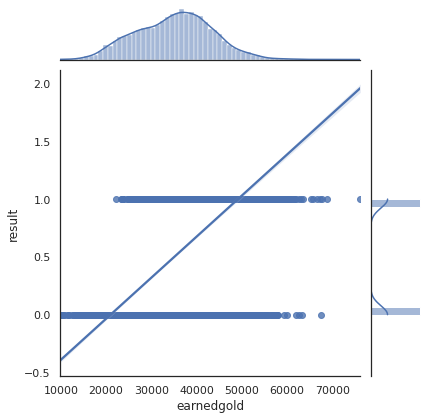

In [ ]:
sns.jointplot(x=dfwithdummy['earnedgold'], y=dfwithdummy['result'], kind='reg')

- There is no big impact about kill count

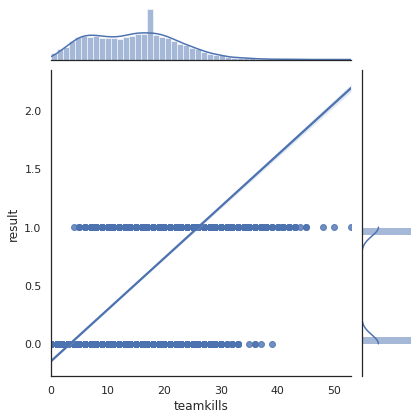

In [ ]:
sns.jointplot(x=dfwithdummy['teamkills'], y=dfwithdummy['result'], kind='reg')

- There is no big impact about kill count

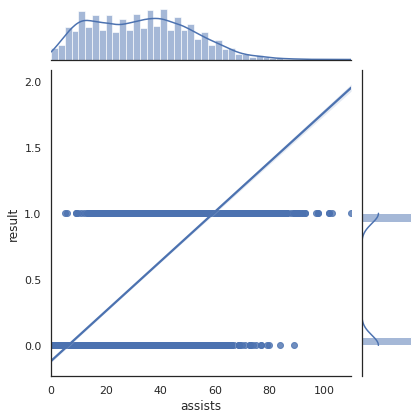

In [ ]:
sns.jointplot(x=dfwithdummy['assists'], y=dfwithdummy['result'], kind='reg')

- Killing enemy jungle monsters helps winning

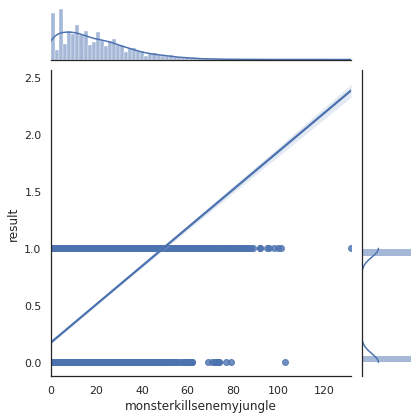

In [ ]:
sns.jointplot(x=dfwithdummy['monsterkillsenemyjungle'], y=dfwithdummy['result'], kind='reg')

- From 2 component pca we cant classify all data with high accuracy. But we can see there are some we can identify easily from bottom-left of graph.

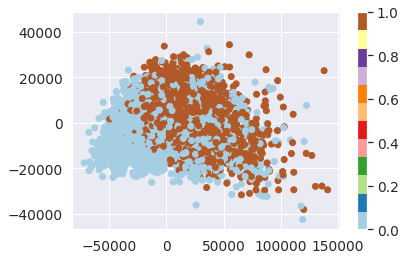

In [ ]:
pca = PCA(n_components=2)
proj = pca.fit_transform(dfwithdummy.drop(columns=["result"]))
plt.scatter(proj[:, 0], proj[:, 1], c=dfwithdummy.result, cmap="Paired")
plt.colorbar()

# **Creating Model with Artifical Neural Network**

- Splitting data and target variable

In [ ]:
X = dfwithdummy.drop(columns=['result'], inplace=False)
Y = dfwithdummy.result

- Splitting train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.2,random_state =123)

In [ ]:
print(X_train.shape, y_train.shape,y_test.shape )

(8942, 1246) (8942,) (2236,)


- Creating model

In [ ]:
input_number = X_train.shape[1] 

model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(input_number,)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', input_shape=(input_number,)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1024)              1276928   
_________________________________________________________________
module_wrapper_8 (ModuleWrap (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 256)              

In [ ]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.33, verbose=2, epochs=100)

Epoch 1/100
188/188 - 2s - loss: 141.7359 - accuracy: 0.6827 - val_loss: 2.6507 - val_accuracy: 0.8651
Epoch 2/100
188/188 - 1s - loss: 2.9370 - accuracy: 0.7995 - val_loss: 0.8641 - val_accuracy: 0.8729
Epoch 3/100
188/188 - 1s - loss: 1.3928 - accuracy: 0.8321 - val_loss: 0.7511 - val_accuracy: 0.8445
Epoch 4/100
188/188 - 1s - loss: 0.7881 - accuracy: 0.8686 - val_loss: 1.1111 - val_accuracy: 0.7943
Epoch 5/100
188/188 - 1s - loss: 0.5208 - accuracy: 0.8975 - val_loss: 0.0807 - val_accuracy: 0.9709
Epoch 6/100
188/188 - 1s - loss: 0.3623 - accuracy: 0.9059 - val_loss: 0.0864 - val_accuracy: 0.9681
Epoch 7/100
188/188 - 1s - loss: 0.2573 - accuracy: 0.9297 - val_loss: 0.1575 - val_accuracy: 0.9468
Epoch 8/100
188/188 - 1s - loss: 0.2351 - accuracy: 0.9309 - val_loss: 0.0838 - val_accuracy: 0.9726
Epoch 9/100
188/188 - 1s - loss: 0.2462 - accuracy: 0.9282 - val_loss: 0.0979 - val_accuracy: 0.9678
Epoch 10/100
188/188 - 1s - loss: 0.2674 - accuracy: 0.9231 - val_loss: 0.1417 - val_accu

In [ ]:
score, acc = model.evaluate(X_test, y_test,320)
print('Test score:', score)
print('Test accuracy:', acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.9772
Test score: 0.31162238121032715
Test accuracy: 0.9771913886070251


- We have predicted win by %67 rate

In [ ]:
pred = model.predict(X_test.iloc[15].values.reshape(1,input_number))
print("True value     : ", y_test.iloc[15])
print("Predicted value : ", pred[0][0])

True value     :  1
Predicted value :  0.6721717


- We have predicted win by %64 rate

In [ ]:
pred = model.predict(X_test.iloc[96].values.reshape(1,input_number))
print("True value     : ", y_test.iloc[96])
print("Predicted value : ", pred[0][0])

True value     :  1
Predicted value :  0.6446869


- We have predicted lose wit %93 rate

In [ ]:
pred = model.predict(X_test.iloc[196].values.reshape(1,input_number))
print("True value     : ", y_test.iloc[196])
print("Predicted value : ", pred[0][0])

True value     :  0
Predicted value :  0.07413334


- Confusion matrix of test set

False Positives and False Negatives are likely to same so data is well balanced and well predicted.

In [ ]:

y_pred = model.predict(X_test)
y_pred_round = np.around(y_pred).astype(int)
matrix = confusion_matrix(y_test, y_pred_round)
print(matrix)

[[1104   24]
 [  27 1081]]
